# Lecture 2 - Data and Features

Michael Mommert, 2023FS, Machine Learning (BBWL), University of St. Gallen

This notebook contains code to generate some of the visualizations presented in the lecture slides.


## Image representations

Read in sample image and plot it.

In [2]:
from scipy.misc import face

# read in color image
img = face()

# read in grayscale image
img_bw = face(gray=True)

In [3]:
print('color image shape:', img.shape)
print('grayscale image shape:', img_bw.shape)

color image shape: (768, 1024, 3)
grayscale image shape: (768, 1024)


([], [])

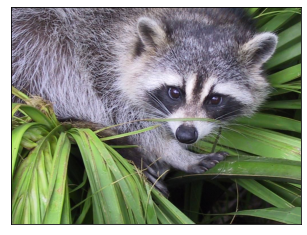

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img)

# remove axis ticks
plt.xticks([])
plt.yticks([])

([], [])

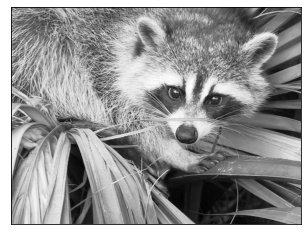

In [5]:
plt.imshow(img_bw, cmap="Greys_r")
plt.xticks([])
plt.yticks([])

Split image channels and plot them individually using custom color maps.

([], [])

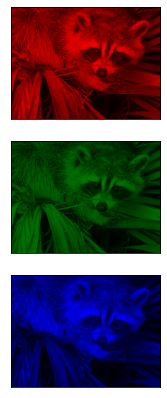

In [6]:
from matplotlib.colors import LinearSegmentedColormap

# create suplots
f, ax = plt.subplots(3, 1, sharex=True, sharey=True,
                     figsize=(3,7))

# plot each channel individually with a custom colormap
for i in range(3):
    ax[i].imshow(img[:,:,i], cmap={
        0: LinearSegmentedColormap.from_list(colors=['Black', 'Red'], name='Rmap'),
        1: LinearSegmentedColormap.from_list(colors=['Black', 'Green'], name='Gmap'),
        2: LinearSegmentedColormap.from_list(colors=['Black', 'Blue'], name='Bmap')
        }[i],
        vmin=0, vmax=255)

plt.xticks([])
plt.yticks([])

## Image feature engineering

Create a pixel value histogram for each channel.

([], [])

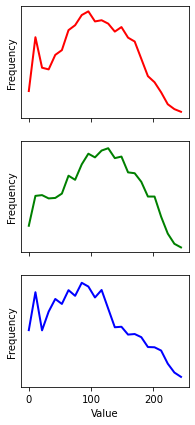

In [7]:
import numpy as np

f, ax = plt.subplots(3, 1, sharex=True, sharey=True,
                     figsize=(3,7))

# create channel-specifc histogram and plot it 
for i in range(3):
    hist, bins = np.histogram(img[:,:,i], np.linspace(0, 255, 25))
    ax[i].plot(bins[:-1], hist, 
               color={0:'red', 1:'green', 2:'blue'}[i], lw=2)
    ax[i].set_ylabel('Frequency')

ax[2].set_xlabel('Value')
plt.yticks([])


### Histogram of oriented gradients

In [8]:
from skimage.transform import resize
from skimage.feature import hog

# resize image (to make sure it can be split into 8x8 cells)
img_resized = resize(img, (96*8, 128*8))

# apply hog (using 16x16 cells for better visualization)
fd, hog_img = hog(img_resized, orientations=9, pixels_per_cell=(16, 16),
                	cells_per_block=(1, 1), visualize=True, multichannel=True)


visualize HOG

([], [])

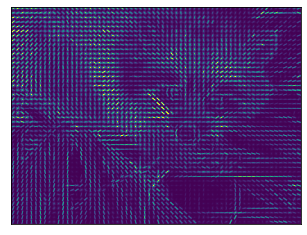

In [9]:
plt.imshow(hog_img, vmin=0, vmax=0.05)
plt.xticks([])
plt.yticks([])